# USA Real Estate Exploratory Analysis

### This notebook includes:

I. import of libraries and dataset

II. dataset key

III. quality checks and idenifying available data

IV. data cleaning

V. looking for trends that may exist

## I. import of libraries and dataset

In [5]:
# import libraries
import pandas as pd
import numpy as np
import os

In [7]:
# create path shortcut
path = r'C:\Users\lisag\Desktop\CF Work\Immersion 6 Tasks'

In [9]:
# import data set
df = pd.read_csv(os.path.join(path, 'USA Real Estate Dataset.csv'), index_col = False)

## II. dataset key

brokered by (categorically encoded agency/broker)

status (housing status - a. ready for sale or b. ready to build)

price (housing price, it is either the current listing price or recently sold price if the house is sold recently)

bed (# of beds)

bath (# of bathrooms)

acre_lot (property/land size in acres)

street (categorically encoded street address)

city (city name)

state (state name)

zip_code (postal code of the area)

house_size (house area/size/living space in square feet)

prev_sold_date (previously sold date)

## III. quality checks and idenifying available data

In [14]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [16]:
# find number of rows and columns
df.shape

(2226382, 12)

In [18]:
# identify column names
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [20]:
# identify data types
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

In [22]:
# check for statistical anomalies 
df.describe().round(1)

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2221849.0,2.224841e+06,1745065.0,1714611.0,1900793.0,2215516.0,2226083.0,1.657898e+06
mean,52939.9,5.241955e+05,3.3,2.5,15.2,1012324.9,52186.7,2.714500e+03
std,30642.8,2.138893e+06,1.6,1.7,762.8,583763.5,28954.1,8.081635e+05
min,0.0,0.000000e+00,1.0,1.0,0.0,0.0,0.0,4.000000e+00
25%,23861.0,1.650000e+05,3.0,2.0,0.2,506312.8,29617.0,1.300000e+03
50%,52884.0,3.250000e+05,3.0,2.0,0.3,1012765.5,48382.0,1.760000e+03
75%,79183.0,5.500000e+05,4.0,3.0,1.0,1521173.2,78070.0,2.413000e+03
max,110142.0,2.147484e+09,473.0,830.0,100000.0,2001357.0,99999.0,1.040400e+09


brokered_by, street, and zip_code can be ignored in this context, the outliers in this data may be extreme but not necessarily inaccurate

In [25]:
# find number of and types of house statuses
df['status'].value_counts().sort_index(ascending=False)

status
sold               812009
ready_to_build      25067
for_sale          1389306
Name: count, dtype: int64

In [27]:
# find number of records per state
df['state'].value_counts().sort_index(ascending=False)

state
Wyoming                   4039
Wisconsin                42390
West Virginia            12309
Washington               62461
Virginia                 68763
Virgin Islands             895
Vermont                   2600
Utah                     14557
Texas                   208335
Tennessee                40964
South Dakota              4690
South Carolina           42367
Rhode Island              8157
Puerto Rico               3126
Pennsylvania             78373
Oregon                   32163
Oklahoma                 37140
Ohio                     59207
North Dakota              4268
North Carolina           85745
New York                103159
New Mexico               21074
New Jersey               48199
New Hampshire             3642
New Brunswick                1
Nevada                   14667
Nebraska                  6309
Montana                  10059
Missouri                 45145
Mississippi              16255
Minnesota                43412
Michigan                 42429
Ma

New Brunswick is in Canada and will be removed from the analysis

In [30]:
# find if there are any consistent brokers
df['brokered_by'].value_counts().sort_index

<bound method Series.sort_index of brokered_by
22611.0    45658
16829.0    27732
53016.0    21709
23592.0     9176
30807.0     8464
           ...  
36774.0        1
88410.0        1
92528.0        1
76894.0        1
98730.0        1
Name: count, Length: 110143, dtype: int64>

In [32]:
# get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [34]:
# check for missing values
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

data will need to be cleaned and likely prev_sold_date will be entirely removed

In [37]:
# check for duplicates
print(f"number of duplicate rows: {df.duplicated().sum()}")

number of duplicate rows: 0


In [39]:
# identify unique values
print(f"# of unique bed: {df['bed'].nunique()}")
print(f"# of unique bath: {df['bath'].nunique()}")
print(f"# of unique city: {df['city'].nunique()}")
print(f"price range: {df['price'].min()} - {df['price'].max()}")
print(f"acres range: {df['acre_lot'].min()} - {df['acre_lot'].max()}")
print(f"house size range: {df['house_size'].min()} - {df['house_size'].max()}")

# of unique bed: 99
# of unique bath: 86
# of unique city: 20098
price range: 0.0 - 2147483600.0
acres range: 0.0 - 100000.0
house size range: 4.0 - 1040400400.0


may need to create categories to work within for analysis

## IV. data cleaning

In [43]:
# create a subset for missing values in prev_sold_date 
df_nan_prev_sold_date = df[df['prev_sold_date'].isnull() == True]

In [45]:
df_nan_prev_sold_date.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


it will be assumed this means these are new houses and the NaN will be changed to zero

In [48]:
# replace NaN values with 0 in prev_sold_date column
df['prev_sold_date'] = df['prev_sold_date'].fillna(0)

In [50]:
# remove the 'state' rows with NaN values 
df = df[df['state'].notnull()]

In [52]:
# remove the 'price' rows with NaN values 
df = df[df['price'].notnull()]

In [54]:
# remove the 'zip_code' rows with NaN values 
df = df[df['zip_code'].notnull()]

In [56]:
# remove the 'city' rows with NaN values 
df = df[df['city'].notnull()]

In [58]:
# remove the 'brokered_by' rows with NaN values 
df = df[df['brokered_by'].notnull()]

In [60]:
# check for missing values
df.isnull().sum()

brokered_by            0
status                 0
price                  0
bed               478011
bath              508111
acre_lot          324566
street             10735
city                   0
state                  0
zip_code               0
house_size        564863
prev_sold_date         0
dtype: int64

the other missing values will be left alone for now, as they may not be relevant

In [63]:
# dropping 'street' column as that level of detail is unnecessary 
df = df.drop(columns = ['street'])

In [65]:
# check for mixed types
for col in df.columns.tolist():
  weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

prev_sold_date


In [67]:
# convert to datetime format and replace zeros will NaT (Not a Time)
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

In [69]:
df.dtypes

brokered_by              float64
status                    object
price                    float64
bed                      float64
bath                     float64
acre_lot                 float64
city                      object
state                     object
zip_code                 float64
house_size               float64
prev_sold_date    datetime64[ns]
dtype: object

In [71]:
# change 'brokered_by' to object/string data type
df['brokered_by'] = df['brokered_by'].astype('str')

In [73]:
# change 'zip_code' to object/string data type
df['zip_code'] = df['zip_code'].astype('str')

In [75]:
df.dtypes

brokered_by               object
status                    object
price                    float64
bed                      float64
bath                     float64
acre_lot                 float64
city                      object
state                     object
zip_code                  object
house_size               float64
prev_sold_date    datetime64[ns]
dtype: object

In [77]:
# remove New Brunswick from the df
df = df[df['state'] != 'New Brunswick']

In [79]:
# export cleaned dataframe
df.to_csv(os.path.join(path, 'USA Real Estate Cleaned.csv'))

### further clean data by removing outliers

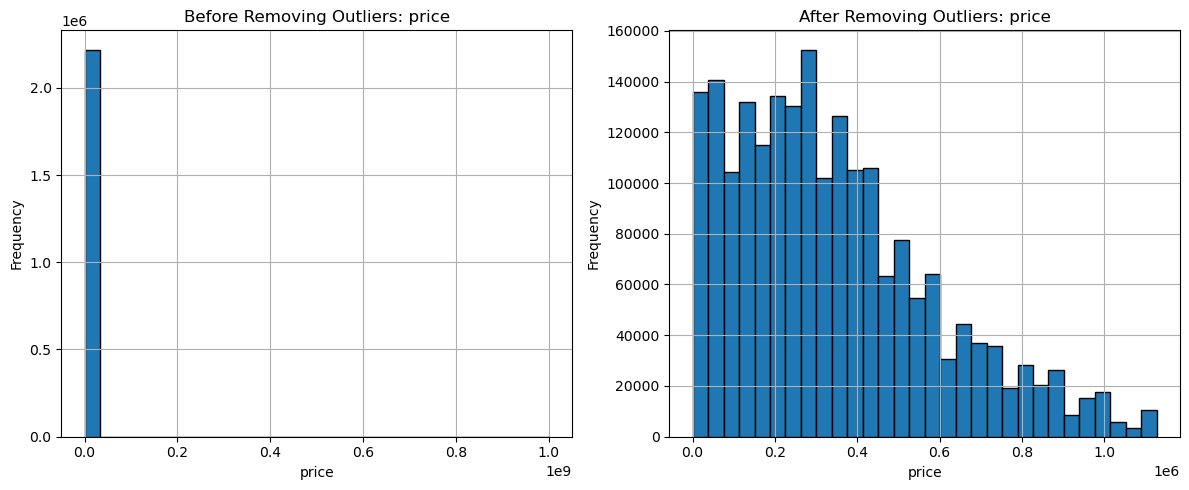

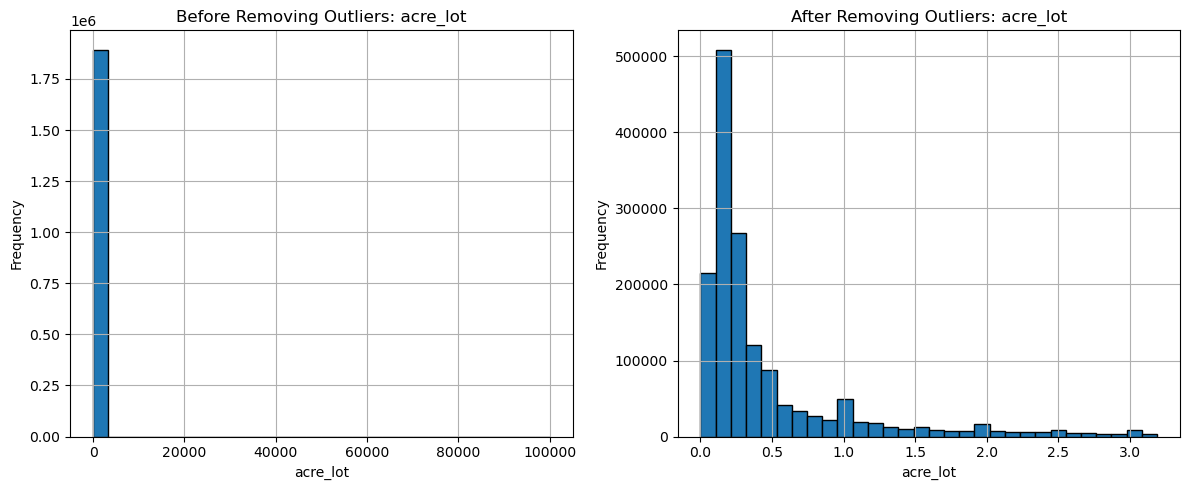

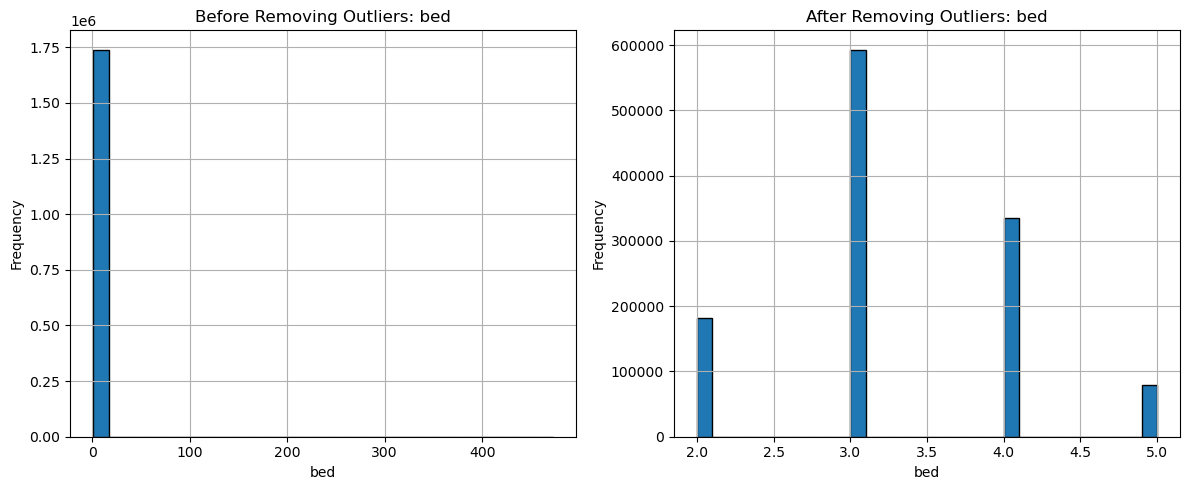

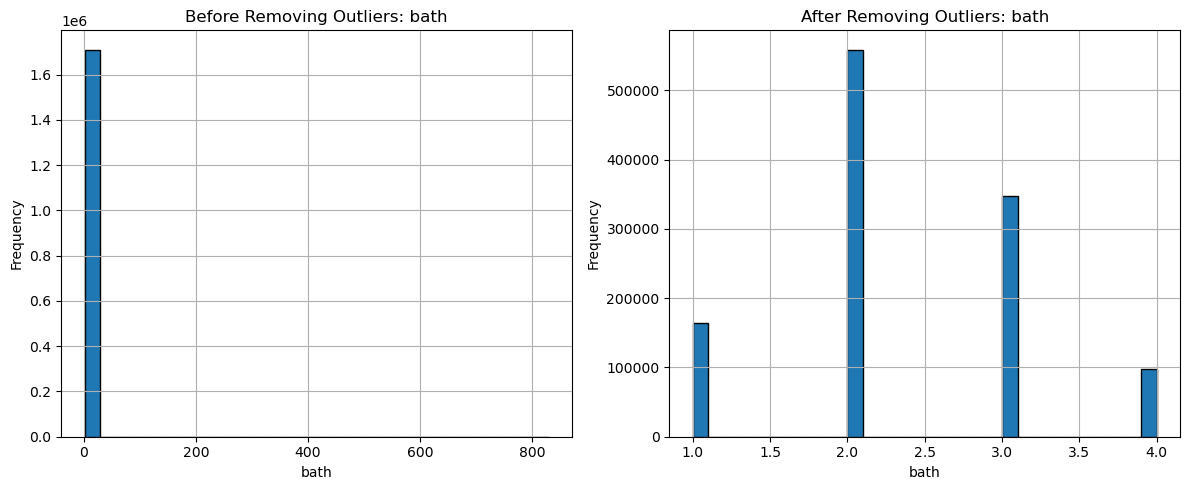

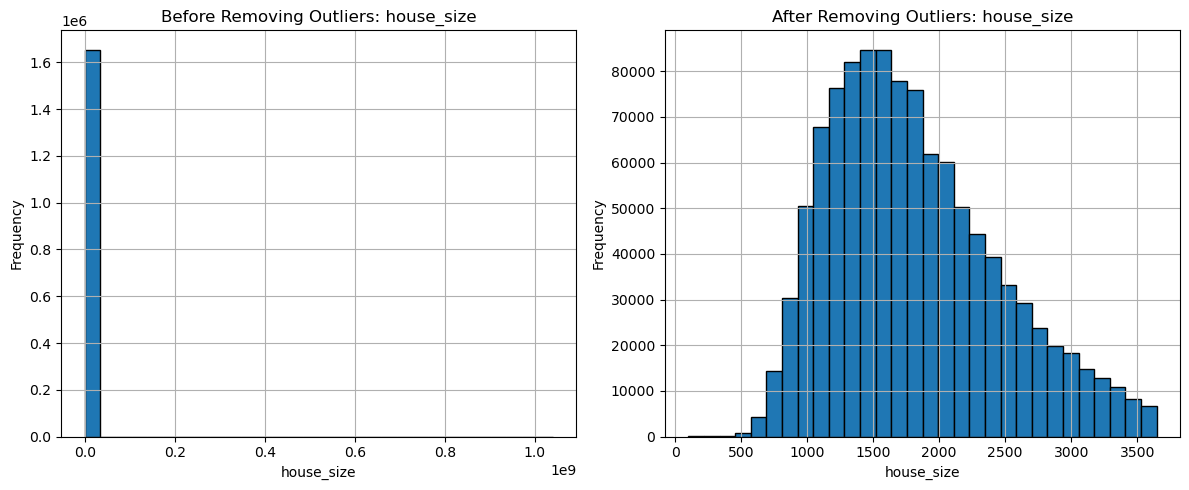

       Column  IQR Multiplier  Total Values  Outliers Removed  \
0       price             1.5       2218715            171101   
1    acre_lot             3.0       1894149            237544   
2         bed             1.5       1740705            118677   
3        bath             1.5       1710605             78894   
4  house_size             1.5       1653853            114484   

   Percentage Removed (%)  
0                    7.71  
1                   12.54  
2                    6.82  
3                    4.61  
4                    6.92  


In [82]:
import matplotlib.pyplot as plt

def remove_outliers_custom_iqr(df, columns, iqr_multipliers=None):
    """
    Removes outliers from the specified columns using the IQR method,
    allows custom IQR multipliers for specific columns, generates a 
    report on removed outliers, and plots histograms before and after removal.

    Parameters:
    df (pd.DataFrame): The DataFrame to clean.
    columns (list): List of column names to check for outliers.
    iqr_multipliers (dict, optional): Dictionary with custom multipliers for specific columns.
                                      If None, default 1.5 is used.

    Returns:
    pd.DataFrame: The cleaned DataFrame with outliers removed.
    pd.DataFrame: A report showing outliers removed and percentage of data affected.
    """
    df_cleaned = df.copy()
    report = []

    for col in columns:
        if df_cleaned[col].dtype in ['int64', 'float64']:  # ensure it's a numerical column
            # get custom IQR multiplier if specified, otherwise use default 1.5
            multiplier = iqr_multipliers.get(col, 1.5) if iqr_multipliers else 1.5

            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
            
            # count outliers
            total_values = df[col].count()
            outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
            percentage_removed = (outliers_count / total_values) * 100
            
            # append report data
            report.append({
                'Column': col,
                'IQR Multiplier': multiplier,
                'Total Values': total_values,
                'Outliers Removed': outliers_count,
                'Percentage Removed (%)': round(percentage_removed, 2)
            })
            
            # plot before removing outliers
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            df[col].hist(bins=30, edgecolor='black', ax=axes[0])
            axes[0].set_title(f'Before Removing Outliers: {col}')
            
            # remove outliers
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
            
            # plot after removing outliers
            df_cleaned[col].hist(bins=30, edgecolor='black', ax=axes[1])
            axes[1].set_title(f'After Removing Outliers: {col}')
            
            # formatting
            for ax in axes:
                ax.set_xlabel(col)
                ax.set_ylabel('Frequency')
            
            plt.tight_layout()
            plt.show()
    
    # convert report to DataFrame
    report_df = pd.DataFrame(report)

    return df_cleaned, report_df

# usage:
columns_to_check = ['price', 'acre_lot', 'bed', 'bath', 'house_size']

# custom IQR multiplier (e.g., acre_lot uses 3.0 instead of 1.5)
custom_multipliers = {'acre_lot': 3.0}  

df_cleaned, outlier_report = remove_outliers_custom_iqr(df, columns_to_check, iqr_multipliers=custom_multipliers)

# display the outlier report
print(outlier_report)

In [84]:
df_cleaned.shape

(1083017, 11)

In [86]:
df_cleaned.describe().round(1)

,price,bed,bath,acre_lot,house_size,prev_sold_date
count,1083017.0,1083017.0,1083017.0,1083017.0,1083017.0,1083017
mean,380177.6,3.2,2.3,0.4,1807.7,2009-02-15 04:40:25.956379136
min,1.0,2.0,1.0,0.0,100.0,1901-01-01 00:00:00
25%,220000.0,3.0,2.0,0.1,1320.0,2004-07-14 00:00:00
50%,339900.0,3.0,2.0,0.2,1704.0,2021-10-27 00:00:00
75%,499000.0,4.0,3.0,0.3,2203.0,2022-02-18 00:00:00
max,1127000.0,5.0,4.0,3.2,3647.0,2026-04-08 00:00:00
std,218228.7,0.8,0.8,0.5,637.6,NaN


In [90]:
# export outlier removed dataframe
df_cleaned.to_csv(os.path.join(path, 'USA Real Estate Cleaned No Outliers.csv'))

## V. looking for trends that may exist

In [93]:
# removing scientific notation from the results
pd.set_option('display.float_format', '{:.2f}'.format)

In [95]:
# grouping state and average price of homes
df.groupby(['state', 'city'])['price'].mean().reset_index()

,state,city,price
0,Alabama,Abbeville,116580.85
1,Alabama,Adamsville,89428.10
2,Alabama,Addison,132975.00
3,Alabama,Adger,113240.62
4,Alabama,Akron,154838.89
...,...,...,...
30527,Wyoming,Wy Unit Pm 5 78,149500.00
30528,Wyoming,Wy Unit Pm 5 910,159500.00
30529,Wyoming,Wyarno,899000.00
30530,Wyoming,Wyoming,99900.00


In [97]:
# grouping state and brokers
df.groupby('state')['brokered_by'].count().reset_index()

,state,brokered_by
0,Alabama,34004
1,Alaska,2538
2,Arizona,72675
3,Arkansas,23014
4,California,226400
5,Colorado,32201
6,Connecticut,14004
7,Delaware,8624
8,District of Columbia,6624
9,Florida,247117


In [99]:
# grouping state and house size average
df.groupby('state')['house_size'].mean().reset_index()

,state,house_size
0,Alabama,2149.79
1,Alaska,2269.92
2,Arizona,20007.54
3,Arkansas,2221.83
4,California,1930.52
5,Colorado,2459.38
6,Connecticut,2231.32
7,Delaware,2133.81
8,District of Columbia,1615.97
9,Florida,1866.23


In [101]:
# grouping sell date and average price
df.groupby('prev_sold_date')['price'].mean().reset_index()

,prev_sold_date,price
0,1901-01-01,339000.00
1,1904-03-18,249900.00
2,1905-07-17,405000.00
3,1906-10-29,345000.00
4,1909-01-19,85900.00
...,...,...
14945,2024-04-17,459900.00
14946,2024-10-01,46000.00
14947,2024-10-26,170000.00
14948,2024-12-06,624990.00


the initial results of this analysis indicate there are strong trends worth looking into, including how states impact house costs and how population and population density might also affect these costs